# Load the pickle file from Data prep module

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
pickle_file_path = r'C:\Users\Nandan Hegde\OneDrive\Documents\GitHub\MSU_CMSE_830_Final_Semester_project\Movie_analysis_dashboard\Interim_Data\Data_prep.pkl'
data = pd.read_pickle(pickle_file_path)
print("Loaded data:")
print(data.info())

Loaded data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            9742 non-null   int64  
 1   title              9742 non-null   object 
 2   genres_x           9742 non-null   object 
 3   avg_rating         9724 non-null   float64
 4   rating_count       9724 non-null   float64
 5   tags               1572 non-null   object 
 6   budget             3537 non-null   float64
 7   revenue            3537 non-null   float64
 8   runtime            3537 non-null   float64
 9   popularity         3537 non-null   float64
 10  vote_average       3537 non-null   float64
 11  vote_count         3537 non-null   float64
 12  release_year       3537 non-null   float64
 13  cast               3537 non-null   object 
 14  crew               3537 non-null   object 
 15  original_language  3537 non-null   object 
 16  netflix_sho

Percentage of Missing Values per Column:
netflix_listed_in    99.938411
netflix_duration     99.938411
netflix_rating       99.938411
netflix_country      99.938411
netflix_cast         99.938411
netflix_director     99.938411
netflix_type         99.938411
netflix_show_id      99.938411
tags                 83.863683
crew                 63.693287
original_language    63.693287
cast                 63.693287
release_year         63.693287
vote_count           63.693287
vote_average         63.693287
popularity           63.693287
runtime              63.693287
revenue              63.693287
budget               63.693287
rating_count          0.184767
avg_rating            0.184767
dtype: float64
Missingness summary saved as 'missingness_summary.csv'


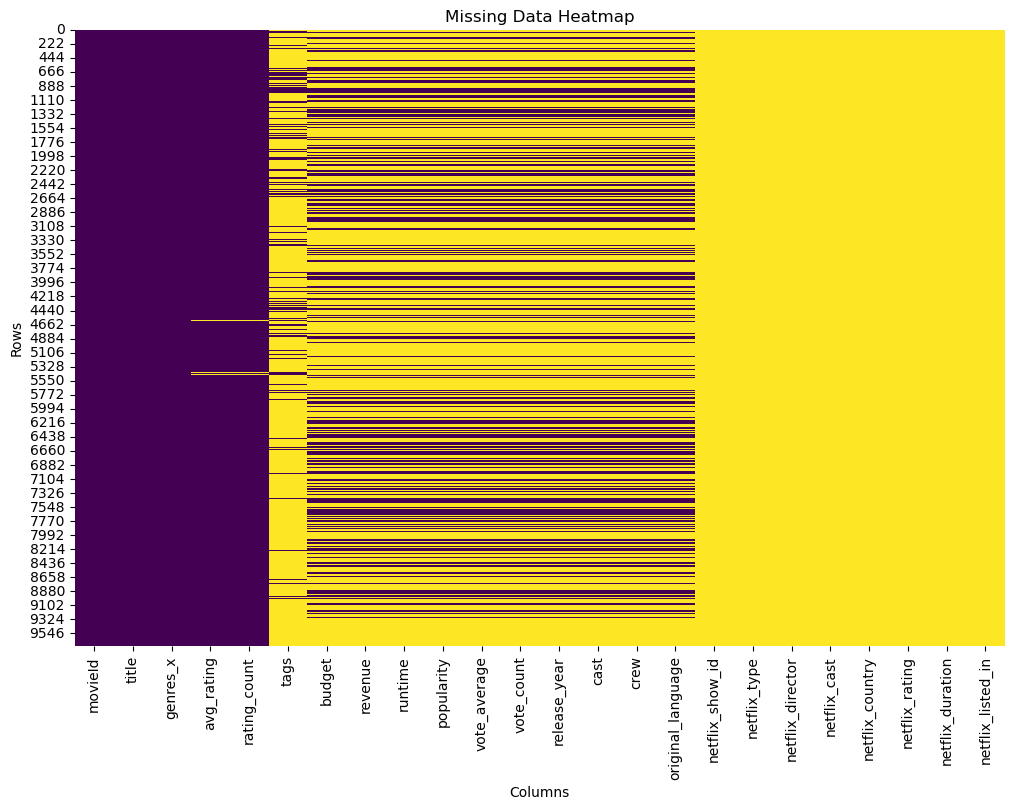

In [3]:
# Step 1: Identify Missing Values
print("Percentage of Missing Values per Column:")
missing_values = data.isnull().sum() / len(data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Save missingness summary for inspection
missing_values.to_csv("missingness_summary.csv")
print("Missingness summary saved as 'missingness_summary.csv'")

# Visualize Missing Data
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

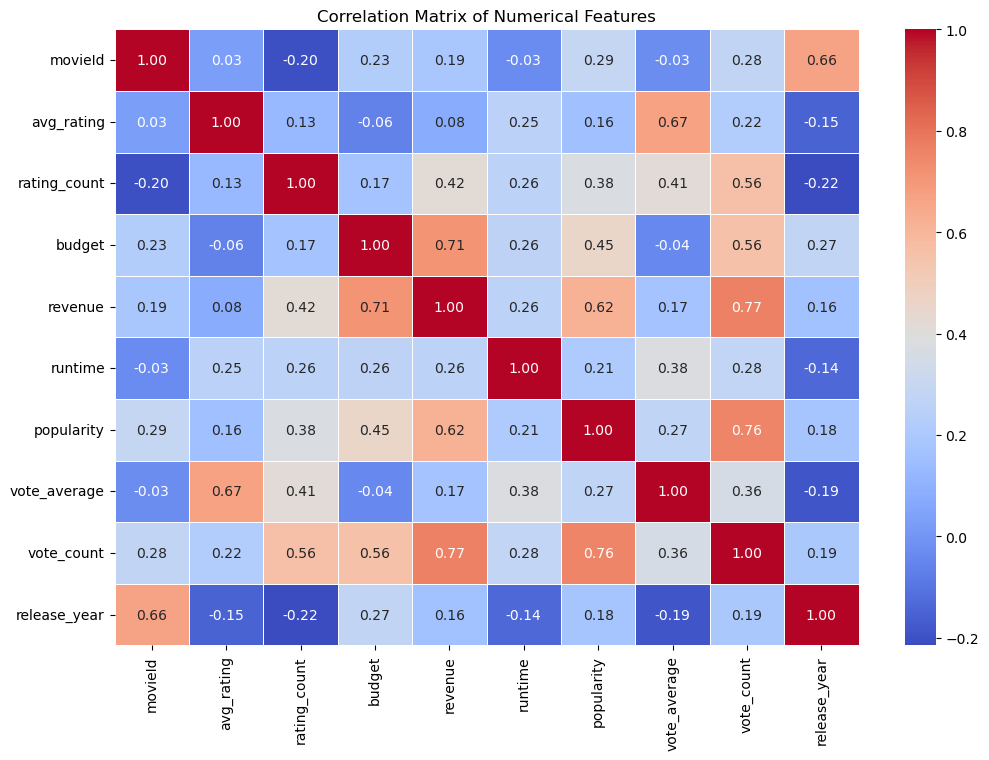


Correlation of missing budget with other numerical columns:
  movieId: 0.05
  avg_rating: 0.07
  rating_count: -0.32
  budget: nan
  revenue: nan
  runtime: nan
  popularity: nan
  vote_average: nan
  vote_count: nan
  release_year: nan

Correlation of missing revenue with other numerical columns:
  movieId: 0.05
  avg_rating: 0.07
  rating_count: -0.32
  budget: nan
  revenue: nan
  runtime: nan
  popularity: nan
  vote_average: nan
  vote_count: nan
  release_year: nan

Correlation of missing runtime with other numerical columns:
  movieId: 0.05
  avg_rating: 0.07
  rating_count: -0.32
  budget: nan
  revenue: nan
  runtime: nan
  popularity: nan
  vote_average: nan
  vote_count: nan
  release_year: nan


C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Nandan Hegde\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


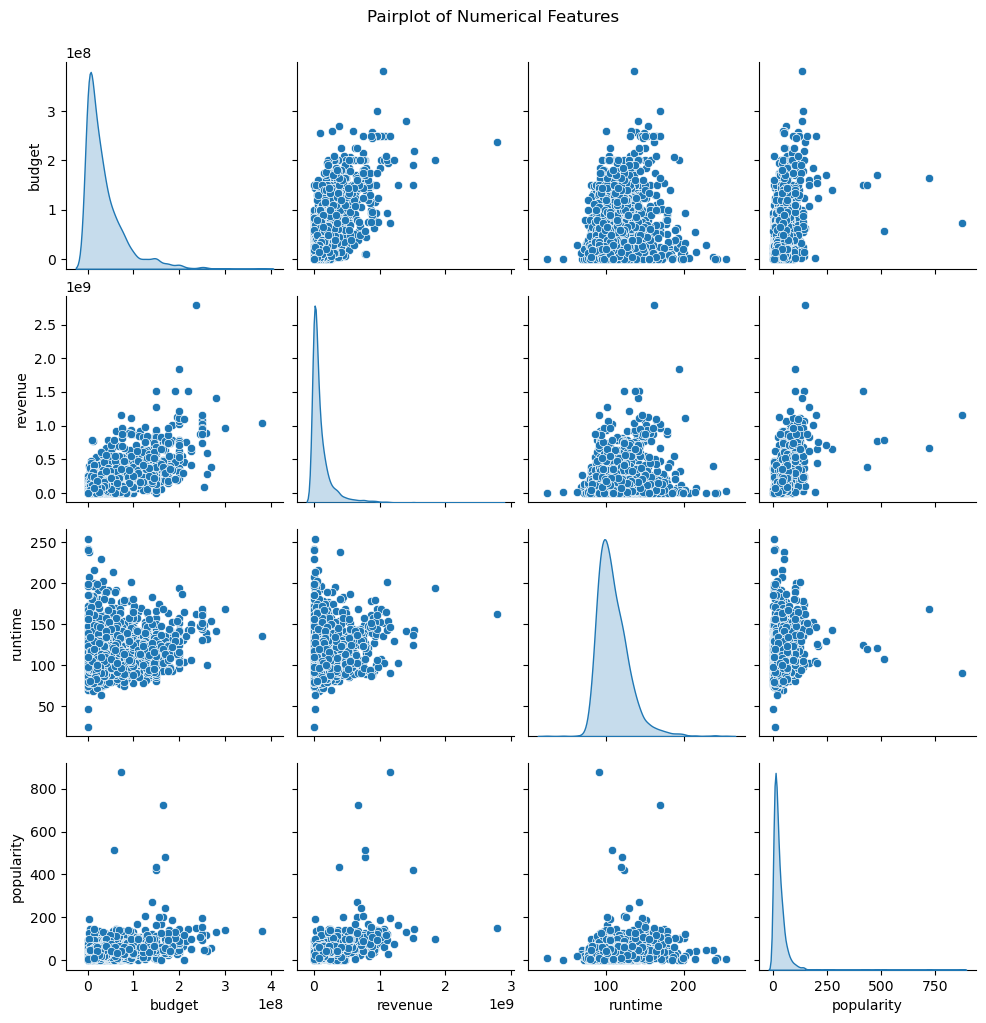

In [4]:
# Step 2: Correlation Analysis (for MAR patterns)
# Select only numerical columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Check correlation of missingness with each numerical column
for col in ['budget', 'revenue', 'runtime']:  # Example columns with missing data
    if col in numeric_data.columns:
        data[f'missing_{col}'] = data[col].isnull().astype(int)  # Create missingness indicator
        
        print(f"\nCorrelation of missing {col} with other numerical columns:")
        for num_col in numeric_data.columns:
            correlation = data[f'missing_{col}'].corr(data[num_col])
            print(f"  {num_col}: {correlation:.2f}")

# Step 3: Visualize Pairwise Relationships (to detect MAR or MNAR)
# Pairplot for key columns
sns.pairplot(data, vars=['budget', 'revenue', 'runtime', 'popularity'], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

**Observations from Correlation Results:**

Low Correlations (Near Zero):

Missingness in budget, revenue, and runtime shows very weak correlations with most numerical columns (movieId, avg_rating, rating_count).
This suggests that the missingness may not be strongly related to observed variables, potentially pointing to MCAR (Missing Completely at Random).

-----

**NaN Correlations:**

Correlation values are NaN for several columns (budget, revenue, etc.). This is likely because missingness overlaps between these columns, making it impossible to compute meaningful correlations.

----

**A moderate negative correlation:** 

A correlation of rating_count (-0.32) with missingness indicates that movies with fewer ratings are more likely to have missing budget, revenue, and runtime. This hints at a possible MAR (Missing at Random) pattern influenced by the popularity of the movies.

----

**Categorizing Missingness (Recap):**

MCAR: If no patterns are found between missingness and other variables, data is missing completely at random.
MAR: If missingness correlates with observed variables like rating_count, imputation methods like regression or KNN can be applied.
MNAR: If missingness is related to the variable itself (e.g., low-budget movies are less likely to report revenue), domain knowledge or specialized techniques are needed.

## Missingness treated dataset

In [5]:
# Step 1: Drop Netflix Columns
columns_to_drop = [col for col in data.columns if col.startswith('netflix')]
data_cleaned = data.drop(columns=columns_to_drop)
print("Dropped Netflix columns due to excessive missingness.")

# Step 2: Impute Numerical Columns

# Select columns for imputation
columns_to_impute = ['budget', 'revenue', 'runtime']
imputer = KNNImputer(n_neighbors=5)

# Apply KNN Imputation
data_cleaned[columns_to_impute] = imputer.fit_transform(data_cleaned[columns_to_impute])

# Step 3: Verify Imputation
print("Missing Values After Imputation:")
print(data_cleaned[columns_to_impute].isnull().sum())

Dropped Netflix columns due to excessive missingness.
Missing Values After Imputation:
budget     0
revenue    0
runtime    0
dtype: int64


In [8]:
# Step 1: Mean/Median Imputation for Minimal Missingness
data_cleaned['avg_rating'].fillna(data_cleaned['avg_rating'].mean(), inplace=True)
data_cleaned['rating_count'].fillna(data_cleaned['rating_count'].median(), inplace=True)

# Step 2: KNN Imputation for Numerical Columns with High Missingness
from sklearn.impute import KNNImputer

columns_to_impute = ['popularity', 'vote_average', 'vote_count']
imputer = KNNImputer(n_neighbors=5)

data_cleaned[columns_to_impute] = imputer.fit_transform(data_cleaned[columns_to_impute])

# Step 3: Placeholder for Categorical Columns
categorical_columns = ['release_year', 'cast', 'crew', 'original_language']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna('Unknown')

# Step 4: Replace Missing Tags with an Empty String
data_cleaned['tags'].fillna('', inplace=True)

# Verify Remaining Missing Values
print("Remaining Missing Values After Imputation:")
print(data_cleaned.isnull().sum())

# Save Final Cleaned Dataset
output_path = r'C:\Users\Nandan Hegde\OneDrive\Documents\GitHub\MSU_CMSE_830_Final_Semester_project\Movie_analysis_dashboard\Interim_Data\Final_Cleaned_Data.pkl'
data_cleaned.to_pickle(output_path)
print(f"Final cleaned dataset saved to: {output_path}")

C:\Users\Nandan Hegde\AppData\Local\Temp\ipykernel_11300\2683524548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['avg_rating'].fillna(data_cleaned['avg_rating'].mean(), inplace=True)
C:\Users\Nandan Hegde\AppData\Local\Temp\ipykernel_11300\2683524548.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

Remaining Missing Values After Imputation:
movieId              0
title                0
genres_x             0
avg_rating           0
rating_count         0
tags                 0
budget               0
revenue              0
runtime              0
popularity           0
vote_average         0
vote_count           0
release_year         0
cast                 0
crew                 0
original_language    0
missing_budget       0
missing_revenue      0
missing_runtime      0
ROI                  0
dtype: int64
Final cleaned dataset saved to: C:\Users\Nandan Hegde\OneDrive\Documents\GitHub\MSU_CMSE_830_Final_Semester_project\Movie_analysis_dashboard\Data_Diagnostics\Final_Cleaned_Data.pkl


C:\Users\Nandan Hegde\AppData\Local\Temp\ipykernel_11300\2683524548.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['tags'].fillna('', inplace=True)
